In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Emplacement
folder = "/Users/gregoiregobert/Downloads/42/knight"
folder = "/home/ggobert/Downloads"

df = pd.read_csv(folder + "/Train_knight.csv")
df = df.drop(columns='knight')

In [3]:

# Standardisation des données (important avant une PCA)
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)  # df : ton DataFrame sans les colonnes non numériques/catégorielles

# PCA
pca = PCA()
pca.fit(scaled_df)

# Variance expliquée par chaque composante principale
explained_variance = pca.explained_variance_ratio_
print('Variances (percentage)\n', explained_variance)

Variances (percentage)
 [4.42124322e-01 1.83133809e-01 9.86939994e-02 6.44725649e-02
 5.48418978e-02 3.86419671e-02 2.40371418e-02 1.86115266e-02
 1.42841975e-02 1.14635004e-02 1.03990775e-02 9.15659049e-03
 8.25582942e-03 4.49675980e-03 3.24922360e-03 2.80700452e-03
 2.22879421e-03 1.99287079e-03 1.59928087e-03 1.12338278e-03
 1.11953696e-03 8.29193824e-04 7.91693696e-04 5.73407566e-04
 5.14260951e-04 2.68407149e-04 2.06171597e-04 5.70303169e-05
 2.27265764e-05 3.83020159e-06]


In [4]:
cumulative_variance = np.cumsum(explained_variance)
print('Cumulative Variances(percentage)\n', cumulative_variance)

# Trouver le nombre de composantes nécessaires
nb_components_90 = np.argmax(cumulative_variance >= 0.9) + 1  # +1  (index 0-based)

Cumulative Variances(percentage)
 [0.44212432 0.62525813 0.72395213 0.7884247  0.84326659 0.88190856
 0.9059457  0.92455723 0.93884143 0.95030493 0.960704   0.9698606
 0.97811642 0.98261318 0.98586241 0.98866941 0.99089821 0.99289108
 0.99449036 0.99561374 0.99673328 0.99756247 0.99835417 0.99892757
 0.99944183 0.99971024 0.99991641 0.99997344 0.99999617 1.        ]


In [5]:
print(f"Nombre de composantes nécessaires pour atteindre 90% de la variance : {nb_components_90}")

Nombre de composantes nécessaires pour atteindre 90% de la variance : 7


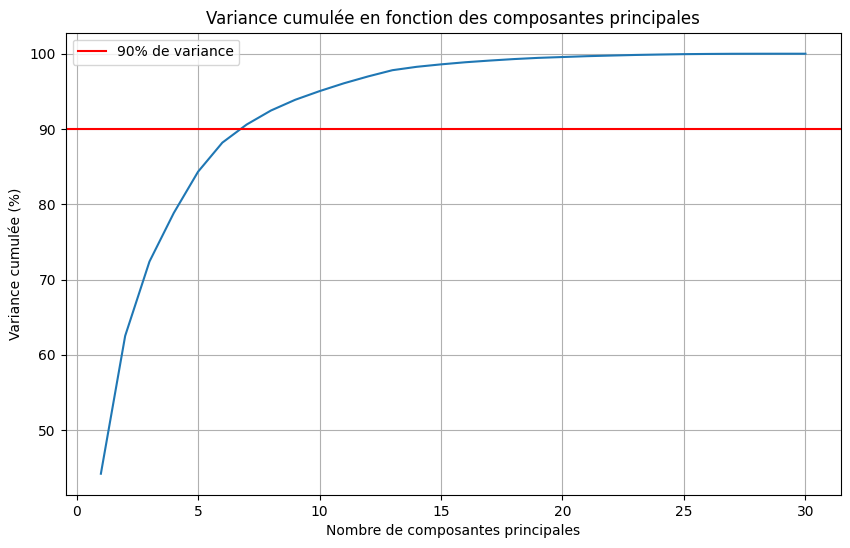

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance * 100)
plt.axhline(y=90, color='r', linestyle='-', label='90% de variance')
plt.title("Variance cumulée en fonction des composantes principales")
plt.xlabel("Nombre de composantes principales")
plt.ylabel("Variance cumulée (%)")
plt.legend()
plt.grid(True)
plt.show()
